           cylinders       weight
cylinders                        
(0, 1]           NaN          NaN
(1, 2]           NaN          NaN
(2, 3]           3.0  2398.500000
(3, 4]           4.0  2308.127451
(4, 5]           5.0  3103.333333


<AxesSubplot:xlabel='cylinders'>

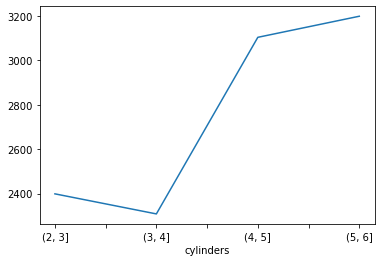

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd

result = pd.read_csv('cars.csv')
df_1 = result[['cylinders','weight']]
category = np.arange(0,8,1)
groups = df_1.groupby(pd.cut(df_1['cylinders'],category)).mean()
print(groups.head())
groups['weight'].plot.line()


In [13]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = result[['cylinders','weight']]
y = result[['mpg']]
X[['cylinders','weight']]=scale.fit_transform(X[['cylinders','weight']])
print(X)

est = sm.OLS(y,X).fit()
est.summary()

     cylinders    weight
0     1.498191  0.630870
1     1.498191  0.854333
2     1.498191  0.550470
3     1.498191  0.546923
4     1.498191  0.565841
..         ...       ...
393  -0.856321 -0.213324
394  -0.856321 -0.993671
395  -0.856321 -0.798585
396  -0.856321 -0.408411
397  -0.856321 -0.296088

[398 rows x 2 columns]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.069
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              14.70
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                    6.92e-07
Time:                        01:11:22   Log-Likelihood:                         -1828.0
No. Observations:                 398   AIC:                                      3660.
Df Residuals:                     396   BIC:                                      3668.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cylinders     -1.1935      2.705     -0.441      0.659      -6.512       4.125
weight        -5.4233      2.705     -2.005      0.046     -10.742      -0.105
==============================================================================
Omnibus:                       44.285   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.272
Skew:                           0.738   Prob(JB):                     4.07e-15
Kurtosis:                       4.348   Cond. No.                         4.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y.groupby(result.cylinders).mean()

mpg
cylinders           
3          20.550000
4          29.286765
5          27.366667
6          19.985714
8          14.963107

In [19]:
scale2 = scale.transform([[8,2000]])
print(scale2)
predicted = est.predict(scale2[0])
print(predicted)

[[ 1.49819126 -1.14737615]]
[4.43456398]
